In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,10

import tifffile

In [3]:
sampleFile = "../../data/Natalie/stitched_20161110_1166hrAEL_400nM20E_t0000.tif"

stack = tifffile.imread(sampleFile)

In [4]:
stack.shape

(151, 1943, 1943)

In [5]:
import sys

In [6]:
sys.path

['',
 '/Users/dibrov/Documents/PhD/software/jupyterNotebooks',
 '/Users/dibrov/Documents/PhD/software/premosa/bin',
 '/Users/dibrov/Documents/PhD/software',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python35.zip',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/lib-dynload',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages',
 '/Users/dibrov/Documents/PhD/software/spimagine',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/extensions',
 '/Users/dibrov/.ipython']

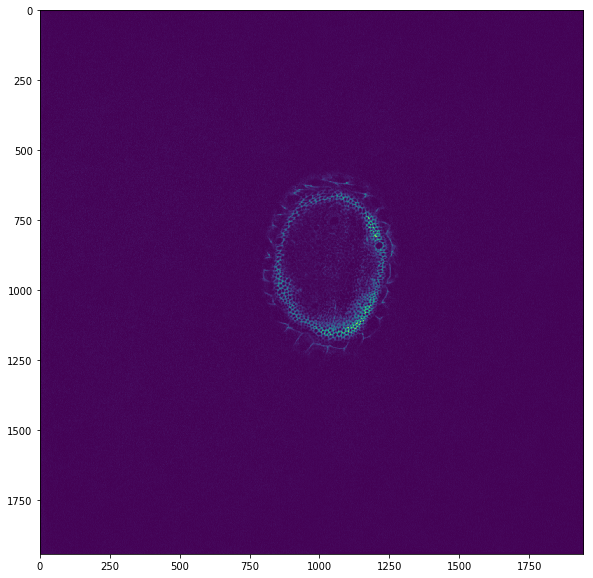

In [6]:
plt.imshow(stack[50,:,:])

In [16]:
def plotProfile(data, interval=None, func=np.mean):
    depth = data.shape[0]
    xmin = 0
    ymin = 0
    _,xmax, ymax = data.shape
    
    if (interval != None):
        xmin,ymin,xmax,ymax = interval
        
    print(xmin, xmax, ymin, ymax)
        
    profile = np.zeros(depth)
    for i in range(depth):
        profile[i] = func(data[i,xmin:xmax,ymin:ymax])
        
    return profile

In [17]:
prof = plotProfile(stack)

0 1943 0 1943


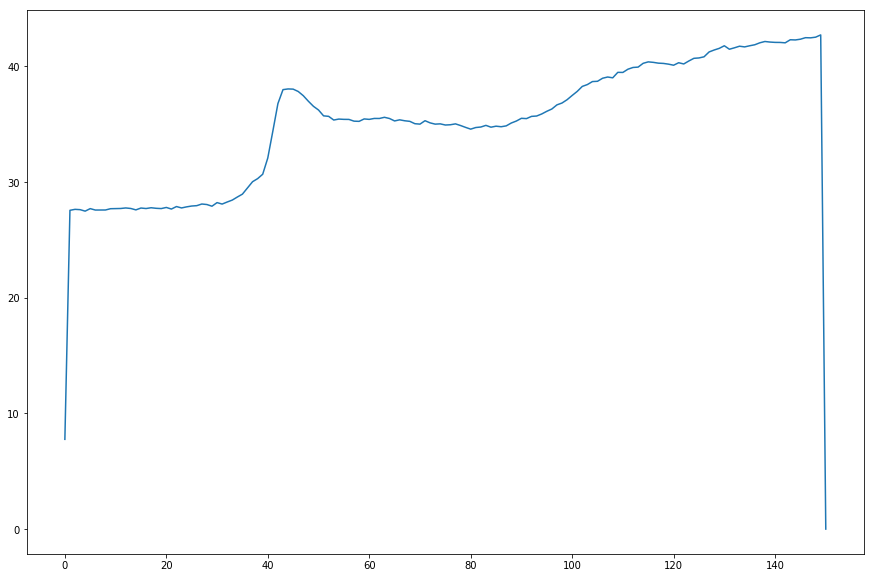

In [18]:
plt.plot(prof)

In [19]:
sz,sx,sy = stack.shape

d = 5
cent = [int(.7*sx/2), int(.7*sy/2)]

interval = [cent[0]-d,cent[1]-d,cent[0]+d,cent[1]+d]
p1 = plotProfile(stack, interval=interval)

675 685 675 685


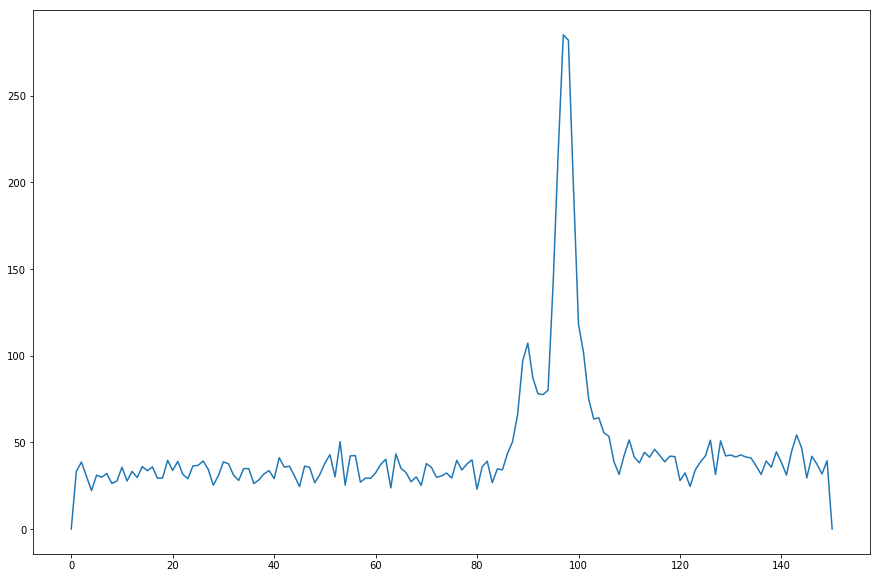

In [20]:
plt.plot(p1);

In [21]:
v1 = plotProfile(stack, interval=interval, func =np.var)

675 685 675 685


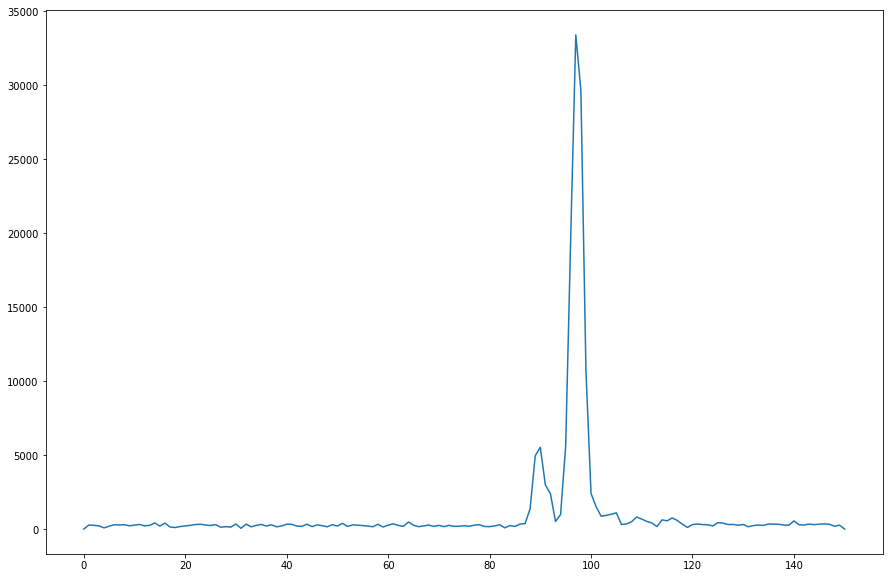

In [22]:
plt.plot(v1)

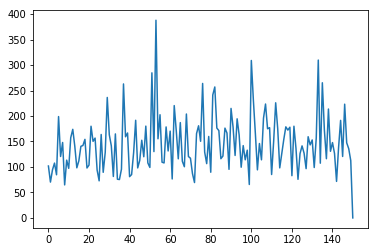

1710 1720 855 865


KeyboardInterrupt: 

In [94]:
from IPython import display
import time
%matplotlib inline



def plotProfileTimelapse(stack, interval=None, func=np.mean):
    
#     print(xt,yt)
    plt.clf()
#     yLim = 1e13
    

    
    plt.plot(plotProfile(stack, interval=interval, func=func))
#     plt.text(xt, yt, 'tau=' +str(i), fontsize=15)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)
    

    
for x in range(d,sx,100-d):
    for y in range(d,sy,100-d):
        interval = [np.maximum(x-d,0),np.maximum(y-d,0),np.minimum(x+d,sx-1), np.minimum(y+d,sy-1)]
        plotProfileTimelapse(stack, interval = interval, func=np.var)
    
plt.close()

In [7]:
from SampleDetection.modules.gpu_variance import gpu_variance

no scikit-tensor detected, so separable functions wont work
This is a python3 issue and can be resolved by:

git clone https://github.com/mnick/scikit-tensor.git
pip3 install scikit-tensor


In [ ]:
import numpy as np
import time


stackVar = np.zeros(stack.shape)
for i in range(stackVar.shape[0]):
    print(i)
    stackVar[i] = gpu_variance(stack[i],Nx=30,Ny=30)
    time.sleep(0.1)

0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pyopencl/cffi_cl.py:1521: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [10]:
gpu_variance(stack[10],Nx=30,Ny=30)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pyopencl/cffi_cl.py:1521: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


array([[ 47.44642 ,  48.88461 ,  49.66493 , ...,  43.945087,  34.784523,
         27.9532  ],
       [ 53.49237 ,  54.873226,  55.603146, ...,  44.96391 ,  35.731163,
         28.91059 ],
       [ 62.775574,  64.011986,  64.62299 , ...,  45.939358,  36.752052,
         29.989548],
       ...,
       [124.99275 , 130.15196 , 134.51263 , ...,  39.50081 ,  34.99163 ,
         31.398159],
       [119.36713 , 124.190926, 128.7659  , ...,  36.32751 ,  31.88874 ,
         28.402946],
       [113.46173 , 118.119514, 122.782875, ...,  33.258896,  28.912529,
         25.63182 ]], dtype=float32)